In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd
import numpy as np
import torch
from mesh_import import mesh
import matplotlib.pyplot as plt
from itertools import chain

In [3]:
bert = mesh.deep.BertService()

In [4]:
def show_cloze(text):
    enc_data = bert.encode(text)
    input_tensor = {k: torch.tensor(v) for k, v in enc_data.items()}
    logits_k, ind_k, last_att = bert.transform(input_tensor)
    for i in range(ind_k.shape[0]):
        buf = []
        for idx, logit in zip(ind_k[i], logits_k[i]):
            # print(tokenizer.decode(int(idx)), p)
            buf.append("%s(%.2f)" % (bert.decode(int(idx)), logit))
        print(" ".join(buf))
    
    fig, axes = plt.subplots(3, 4, figsize=(12, 10))        
    for ax_i, ax in enumerate(chain.from_iterable(axes)):
        ax.imshow(last_att[0,ax_i,:,:].detach().numpy(), cmap="hot")
        ax.set_title(f"Head{ax_i}") 

.(6.08) ,(5.29) )(5.05) -(4.63) # # s(3.90)
他(18.36) 還(10.23) 它(9.29) 也(9.18) 是(8.94)
是(21.41) 他(12.21) 有(11.86) 為(11.75) 們(11.40)
跑(17.77) 走(10.28) 他(8.43) 放(8.26) 老(7.80)
衛(24.93) 卫(16.03) 衞(15.45) 道(9.97) 醫(9.77)
生(23.67) 星(11.50) 後(10.54) 地(10.37) 衛(10.32)
線(24.44) 线(13.87) 綫(12.10) 網(11.88) 隊(11.52)
的(23.47) 之(12.59) ，(11.62) 上(11.34) 。(11.07)
記(25.33) 记(14.10) 陸(12.04) 紀(12.04) 長(11.59)
者(23.59) 事(11.34) 。(10.60) 家(10.05) 人(9.70)
。(10.79) 他(9.30) ：(8.17) ，(7.82) 有(7.46)


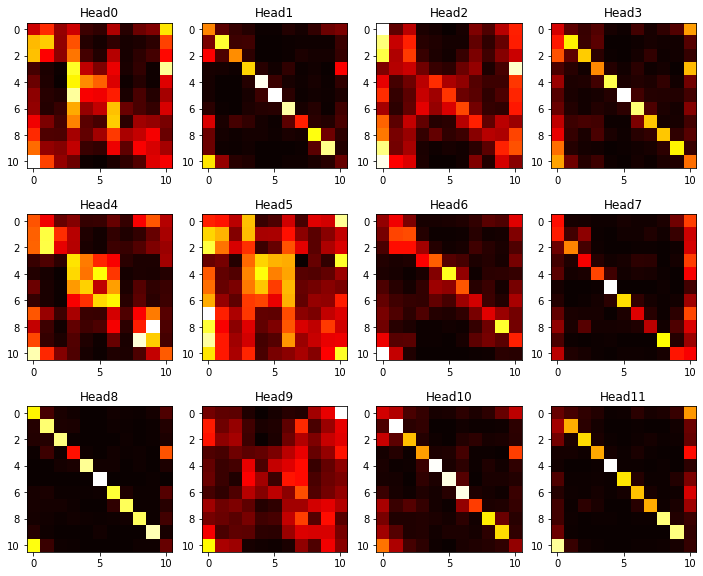

In [13]:
show_cloze("他是跑衛生線的記者")

.(6.14) ,(5.29) )(5.04) -(4.71) 。(4.21)
昨(19.88) 今(12.82) 當(10.67) 天(10.49) 明(10.25)
天(22.93) 日(14.14) 晚(13.77) 夜(12.32) 節(10.26)
老(26.91) 大(12.08) 教(11.91) 師(11.84) 醫(10.23)
師(25.11) 师(15.01) 家(10.78) 老(10.75) 生(9.95)
的(20.51) 從(11.86) 在(11.75) ，(11.71) 們(10.88)
桌(25.26) 椅(14.22) 床(11.57) 凳(11.10) 牆(10.55)
子(21.60) 桌(14.18) 上(12.45) 頭(11.98) 椅(11.34)
上(22.33) 下(13.06) 裡(11.58) 裏(11.41) ，(11.37)
放(23.23) 拿(13.26) 上(11.30) 打(11.21) 擺(11.10)
著(24.25) 着(16.34) 上(13.62) 了(12.37) 有(12.00)
一(25.66) 這(17.78) 兩(16.29) 那(15.24) 三(13.52)
隻(24.11) 個(15.23) 只(13.68) 些(11.66) 大(11.09)
老(26.41) 小(12.33) 大(11.74) 貓(11.12) 鼠(10.79)
鼠(23.01) 貓(12.01) 虎(11.83) 師(10.03) 豚(9.97)
。(9.55) ：(7.47) 的(7.37) ，(7.34) 是(7.09)


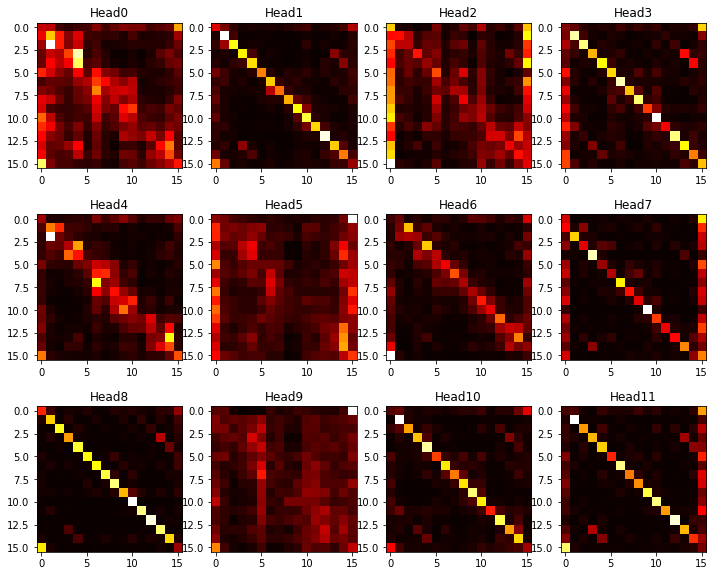

In [31]:
show_cloze("昨天老師的桌子上放著一隻老鼠")

.(6.18) ,(5.29) )(5.14) -(4.85) 。(4.37)
老(22.82) 滑(10.57) 鼠(10.28) 小(10.01) 大(10.00)
鼠(25.74) 貓(12.27) 虎(11.66) 豚(9.90) 狸(9.81)
形(24.44) 狀(14.64) 型(13.30) 環(11.87) 體(10.99)
狀(27.24) 形(19.75) 状(19.13) 態(15.92) 型(14.47)
的(22.08) 了(13.09) ，(12.26) 。(11.92) 形(11.80)
滑(21.79) 老(15.17) 鼠(11.94) 松(10.59) 袋(10.28)
鼠(25.21) 貓(12.93) 豚(10.66) 鼻(10.35) 虎(10.08)
。(9.05) 鼠(8.52) 老(8.27) 小(7.76) 的(7.65)


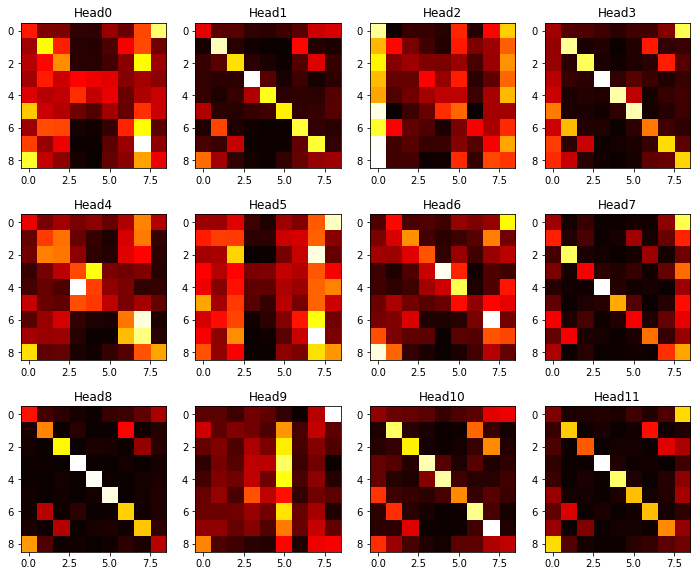

In [32]:
show_cloze("老鼠形狀的滑鼠")